In [1]:
# mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q -U datasets

In [3]:
fig_out_dir = "/content/drive/MyDrive/266 Final Project/figs/"

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Data

In [5]:
# load model scores
output_path = "/content/drive/MyDrive/266 Final Project/model_output/"

# llama 3
with open(output_path+'Meta-Llama-3-8B-Instruct-output-reformatted.pkl', 'rb') as f:
  l30 = pickle.load(f)
with open(output_path+'Meta-Llama-3-8B-Instruct-output-reformatted-ref.pkl', 'rb') as f:
  l3R0 = pickle.load(f)
with open(output_path+'Meta-Llama-3-8B-Instruct-output-reformatted-biolord.pkl', 'rb') as f:
  l3B0 = pickle.load(f)

# huatuo
with open(output_path+'HuatuoGPT-o1-8B-output-reformatted.pkl', 'rb') as f:
  hu0 = pickle.load(f)
with open(output_path+'HuatuoGPT-o1-8B-output-reformatted-ref.pkl', 'rb') as f:
  huR0 = pickle.load(f)
with open(output_path+'HuatuoGPT-o1-8B-output-reformatted-biolord.pkl', 'rb') as f:
  huB0 = pickle.load(f)

# lora r8
with open(output_path+'lora-sft-r8-output-reformatted.pkl', 'rb') as f:
  r80 = pickle.load(f)
with open(output_path+'lora-sft-r8-output-reformatted-ref.pkl', 'rb') as f:
  r8R0 = pickle.load(f)
with open(output_path+'lora-sft-r8-output-reformatted-biolord.pkl', 'rb') as f:
  r8B0 = pickle.load(f)

# lora r32
with open(output_path+'lora-sft-r32-output-reformatted.pkl', 'rb') as f:
  r320 = pickle.load(f)
with open(output_path+'lora-sft-r32-output-reformatted-ref.pkl', 'rb') as f:
  r32R0 = pickle.load(f)
with open(output_path+'lora-sft-r32-output-reformatted-biolord.pkl', 'rb') as f:
  r32B0 = pickle.load(f)

# lora r32 limited
with open(output_path+'lora-sft-r32-limited-output-reformatted.pkl', 'rb') as f:
  l320 = pickle.load(f)
with open(output_path+'lora-sft-r32-limited-output-reformatted-ref.pkl', 'rb') as f:
  l32R0 = pickle.load(f)
with open(output_path+'lora-sft-r32-limited-output-reformatted-biolord.pkl', 'rb') as f:
  l32B0 = pickle.load(f)

# bootstrapped lora r32
with open(output_path+'lora-sft-r32-output-reformatted-bootstrap-output.pkl', 'rb') as f:
  b320 = pickle.load(f)
with open(output_path+'lora-sft-r32-output-reformatted-bootstrap-output-ref.pkl', 'rb') as f:
  b32R0 = pickle.load(f)
with open(output_path+'lora-sft-r32-output-reformatted-bootstrap-output-biolord.pkl', 'rb') as f:
  b32B0 = pickle.load(f)

In [6]:
# # load model text
# output_path = "/content/drive/MyDrive/266 Final Project/model_output/"

# # llama 3
# with open(output_path+'Meta-Llama-3-8B-Instruct-output-reformatted.txt', 'r') as f:
#     Ll3 = f.readlines()
# Ll3 = [l for l in Ll3 if l != '\n']

# # huatuo
# with open(output_path+'HuatuoGPT-o1-8B-output-reformatted.txt', 'r') as f:
#   L1 = f.readlines()
# with open(output_path+'HuatuoGPT-o1-8B-output-reformatted-part2.txt', 'r') as f:
#   L2 = f.readlines()
# with open(output_path+'HuatuoGPT-o1-8B-output-reformatted-part3.txt', 'r') as f:
#   L3 = f.readlines()
# Lhu = L1[:-1] + L2[:-5] + L3
# Lhu = [l for l in Lhu if l != '\n']
# Lhu = [l.split('## Final Response')[1] for l in Lhu]

# # lora r8
# with open(output_path+'lora-sft-r8-output-reformatted.txt', 'r') as f:
#     Lr8 = f.readlines()
# Lr8 = [l for l in Lr8 if l != '\n']

# # lora r32
# with open(output_path+'lora-sft-r32-output-reformatted.txt', 'r') as f:
#     Lr32 = f.readlines()
# Lr32 = [l for l in Lr32 if l != '\n']

# # lora r32 limited
# with open(output_path+'lora-sft-r32-limited-output-reformatted.txt', 'r') as f:
#     Ll32 = f.readlines()
# Ll32 = [l for l in Ll32 if l != '\n']

# # bootstrapped lora r32
# with open(output_path+'lora-sft-r32-output-reformatted-bootstrap-output.txt', 'r') as f:
#     Lb32 = f.readlines()
# Lb32 = [l for l in Lb32 if l != '\n']

# print(len(Ll3), len(Lhu), len(Lr8), len(Lr32), len(Ll32), len(Lb32))

In [7]:
l30.keys()

dict_keys(['entF', 'neuF', 'negF', 'entB', 'neuB', 'negB', 'bow', 'slf'])

In [8]:
def preproc(data, dataR, dataB, fnc=np.mean):
  df = pd.DataFrame()

  # base data
  for k,v in data.items():
    df[k] = fnc(v,axis=1)
  df['ent'] = (df.entF + df.entB)/2
  df['neu'] = (df.neuF + df.neuB)/2
  df['neg'] = (df.negF + df.negB)/2

  # ref scoring
  for k,v in dataR.items():
    df[k+'_R'] = fnc(v,axis=1)
  df['ent'+'_R'] = (df.entF_R + df.entB_R)/2
  df['neu'+'_R'] = (df.neuF_R + df.neuB_R)/2
  df['neg'+'_R'] = (df.negF_R + df.negB_R)/2

  slf_adj = dataR['slf']
  slf_adj[slf_adj==-1] = np.nan
  df['slf_adj'] = np.nanmean(slf_adj,axis=1)
  df['slf_none'] = np.sum(slf_adj == np.nan, axis=1)

  # biolord scoring
  for k,v in dataB.items():
    df[k+'_B'] = fnc(v,axis=1)

  return df

In [9]:
l3 = preproc(l30,l3R0,l3B0)
hu = preproc(hu0,huR0,huB0)
r8 = preproc(r80,r8R0,r8B0)
r32 = preproc(r320,r32R0,r32B0)
l32 = preproc(l320,l32R0,l32B0)
b32 = preproc(b320,b32R0,b32B0)

/tmp/ipython-input-852347002.py:20: RuntimeWarning: Mean of empty slice
  df['slf_adj'] = np.nanmean(slf_adj,axis=1)


In [10]:
l3

entF      neuF      negF      entB      neuB      negB       bow  \
0    0.015194  0.880319  0.104487  0.033927  0.905453  0.060620  0.300000   
1    0.011382  0.954843  0.033775  0.420352  0.531786  0.047863  0.400000   
2    0.013830  0.831631  0.154539  0.175705  0.522072  0.302223  0.200000   
3    0.020496  0.826330  0.153174  0.034974  0.837886  0.127140  0.000000   
4    0.034319  0.841657  0.124024  0.016793  0.822938  0.160268  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
97   0.019802  0.796656  0.183542  0.008878  0.715900  0.275223  0.457143   
98   0.016556  0.970396  0.013048  0.030411  0.782660  0.186930  0.480000   
99   0.017232  0.433970  0.548798  0.163698  0.470485  0.365817  0.500000   
100  0.005815  0.983838  0.010347  0.086420  0.759024  0.154555  0.400000   
101  0.017524  0.929540  0.052936  0.019487  0.839876  0.140637  0.000000   

     slf       ent       neu  ...    neuB_R    negB_R  slf_R     ent_R  \
0    1.0  0.024561  0.892886  ...  0.893773  0.001798    1.0  0.146125   
1    1.0  0.215867  0.743314  ...  0.653425  0.002566    1.0  0.421628   
2    1.0  0.094768  0.676851  ...  0.413086  0.198568    1.0  0.240168   
3    0.9  0.027735  0.832108  ...  0.853525  0.012993    0.6  0.095603   
4    0.9  0.025556  0.832298  ...  0.804993  0.064453    0.6  0.102491   
..   ...       ...       ...  ...       ...       ...    ...       ...   
97   1.0  0.014340  0.756278  ...  0.616172  0.168423    1.0  0.299743   
98   1.0  0.023483  0.876528  ...  0.685773  0.002035    1.0  0.306643   
99   1.0  0.090465  0.452227  ...  0.751299  0.241735    1.0  0.054824   
100  1.0  0.046118  0.871431  ...  0.914722  0.002158    1.0  0.224002   
101  1.0  0.018505  0.884708  ...  0.661848  0.194169    1.0  0.228317   

        neu_R     neg_R  slf_adj  slf_none    bioA_B   bioQA_B  
0    0.850174  0.003701      1.0         0  0.291805  0.619570  
1    0.575260  0.003112      1.0         0  0.457367  0.482259  
2    0.563037  0.196795      1.0         0  0.126828  0.573598  
3    0.882265  0.022132      1.0         0  0.005332  0.257153  
4    0.839568  0.057941      1.0         0  0.235113  0.611211  
..        ...       ...      ...       ...       ...       ...  
97   0.520994  0.179263      1.0         0  0.273104  0.487314  
98   0.690941  0.002416      1.0         0  0.291578  0.458897  
99   0.629341  0.315835      1.0         0  0.688029  0.462807  
100  0.773967  0.002031      1.0         0  0.349027  0.592630  
101  0.570835  0.200848      1.0         0  0.152519  0.411287  

[102 rows x 25 columns]

In [36]:
# summary table

data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

summary = pd.DataFrame()

for (i,d) in enumerate(data):
  tmp = {var:np.mean(d[var]) for var in d.columns}
  tmp = pd.DataFrame(tmp,index=[nm[i]])
  summary = pd.concat([summary,tmp])

In [37]:
summary

entF      neuF      negF      entB      neuB      negB       bow  \
l3   0.028148  0.831377  0.140474  0.114649  0.690305  0.195045  0.179023   
hu   0.466842  0.512144  0.021013  0.457511  0.515801  0.026688  0.279499   
r8   0.077038  0.826993  0.095968  0.133860  0.688775  0.177365  0.178698   
r32  0.079585  0.846208  0.074208  0.137449  0.745900  0.116651  0.191559   
l32  0.068031  0.826555  0.105414  0.129801  0.725827  0.144372  0.174843   
b32  0.074049  0.838063  0.087888  0.138848  0.728454  0.132698  0.199167   

          slf       ent       neu  ...    neuB_R    negB_R     slf_R  \
l3   0.995098  0.071399  0.760841  ...  0.685605  0.121672  0.980392   
hu   0.917647  0.462177  0.513973  ...  0.495066  0.058552  0.693137   
r8   0.753922  0.105449  0.757884  ...  0.559509  0.234162  0.027451   
r32  0.907843  0.108517  0.796054  ...  0.565654  0.206920  0.690196   
l32  0.955882  0.098916  0.776191  ...  0.579480  0.225864  0.864706   
b32  0.899020  0.106449  0.783258  ...  0.557986  0.211485  0.646078   

        ent_R     neu_R     neg_R   slf_adj  slf_none    bioA_B   bioQA_B  
l3   0.205067  0.656152  0.138780  1.000000       0.0  0.315639  0.550406  
hu   0.400884  0.524509  0.072646  0.989624       0.0  0.223223  0.485498  
r8   0.215090  0.540944  0.243966  0.993127       0.0  0.320813  0.609851  
r32  0.207153  0.550296  0.242550  0.975735       0.0  0.315270  0.601150  
l32  0.179130  0.559834  0.261036  0.985294       0.0  0.310484  0.593172  
b32  0.212174  0.541936  0.245890  0.978922       0.0  0.316068  0.602323  

[6 rows x 25 columns]

In [38]:
# ROUGE-1 = "bag of words"
summary['bow']

l3     0.179023
hu     0.279499
r8     0.178698
r32    0.191559
l32    0.174843
b32    0.199167
Name: bow, dtype: float64

In [41]:
# truth entailment score
summary['ent']

l3     0.071399
hu     0.462177
r8     0.105449
r32    0.108517
l32    0.098916
b32    0.106449
Name: ent, dtype: float64

In [42]:
# observed consistency = entailment vs reference
summary['ent_R']

l3     0.205067
hu     0.400884
r8     0.215090
r32    0.207153
l32    0.179130
b32    0.212174
Name: ent_R, dtype: float64

In [39]:
# self reflection certainty
summary['slf_adj']

l3     1.000000
hu     0.989624
r8     0.993127
r32    0.975735
l32    0.985294
b32    0.978922
Name: slf_adj, dtype: float64

## Initial Look

ent/neu/neg_R = average of forward/backward entailment w.r.t. the reference answer = Observed Consistency

ent/neu/neg = entailment w.r.t. the expected answer

slf = self-scoring (slf_R assigns -1 when the model doesn't answer the question)

bow = ROUGE-1

ideally, we have positive correlation between ent_R and bow, and negative correlation between neg_R and bow

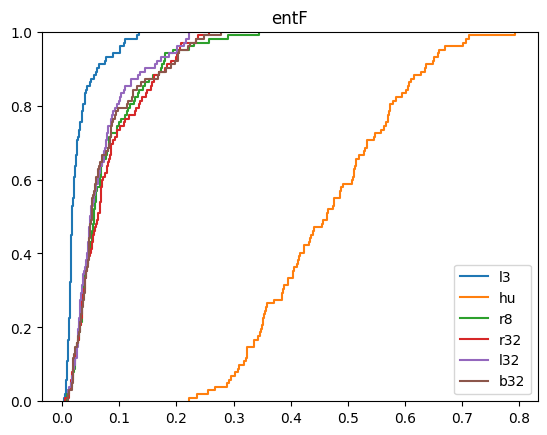

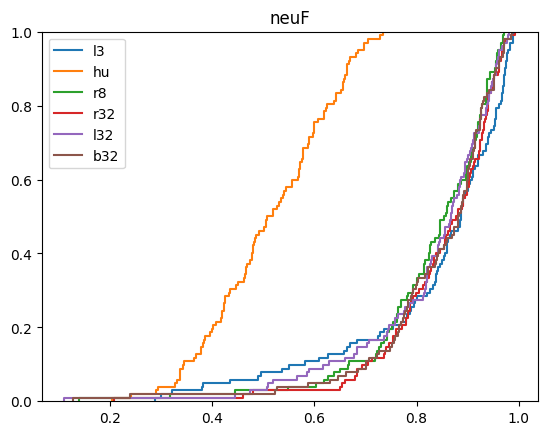

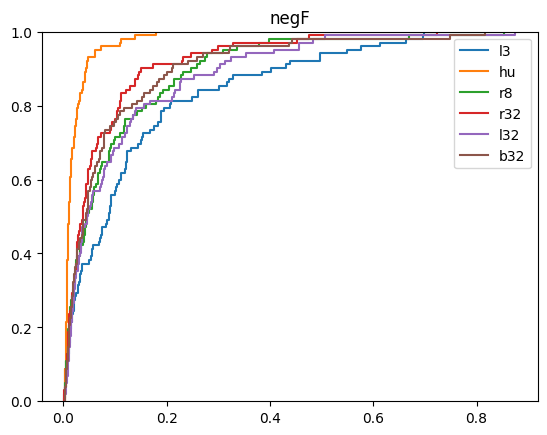

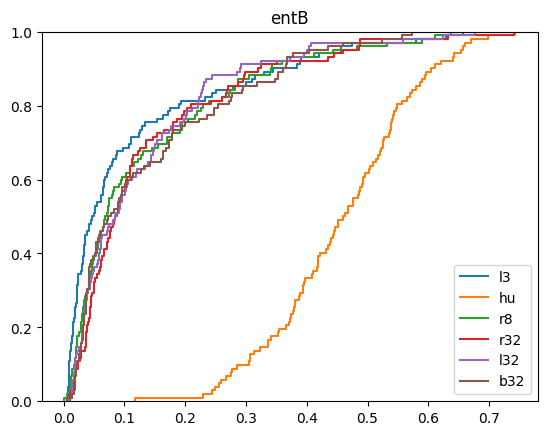

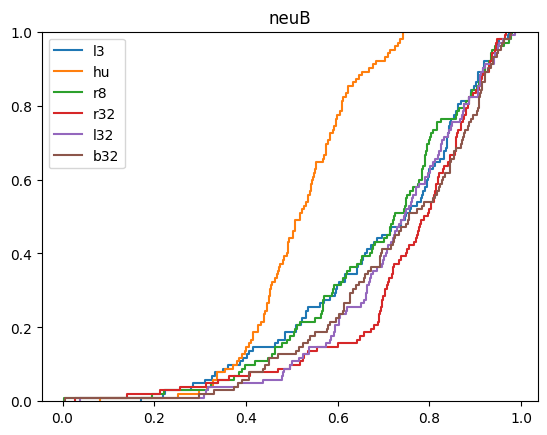

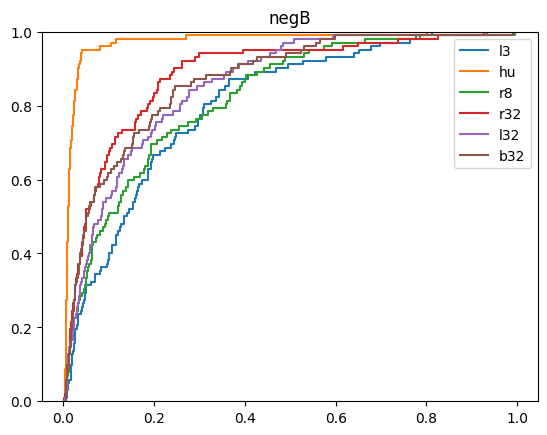

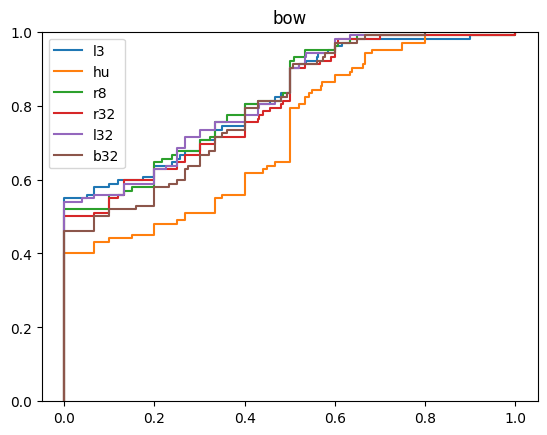

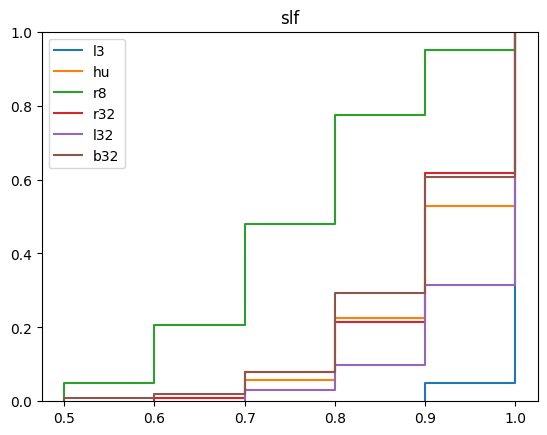

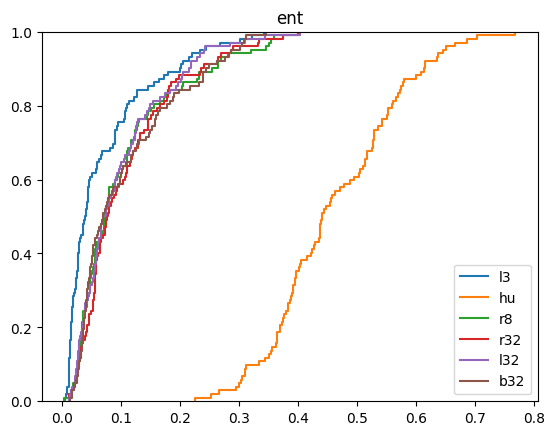

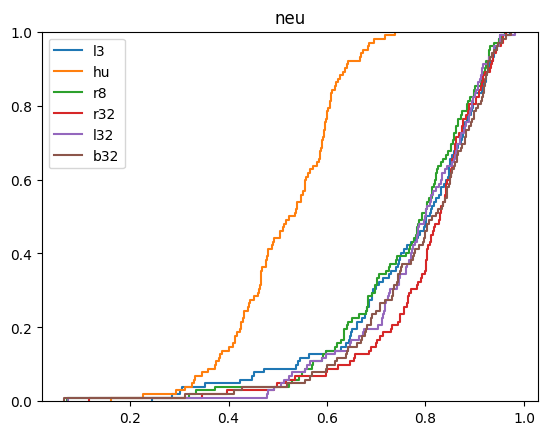

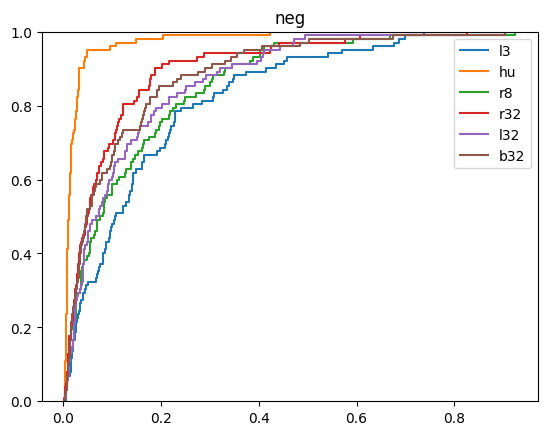

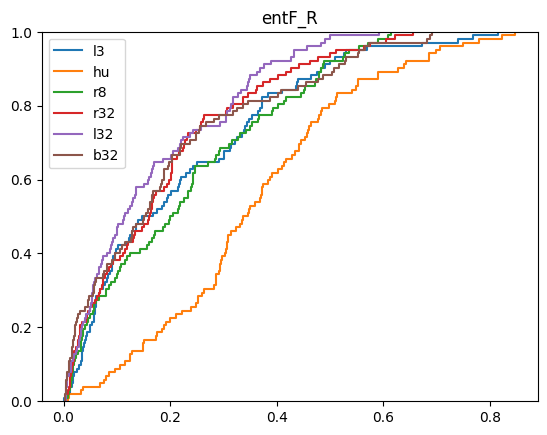

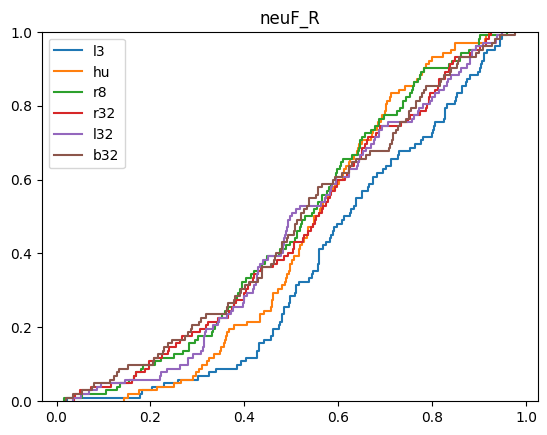

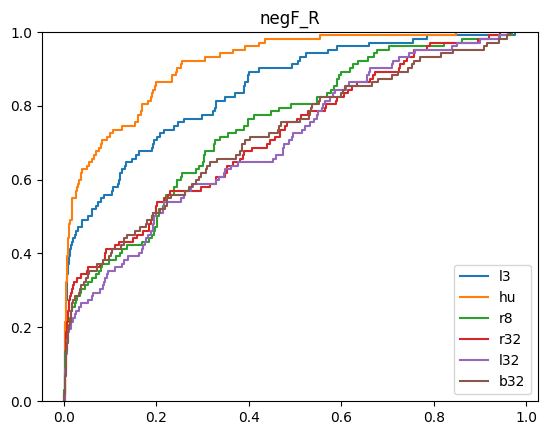

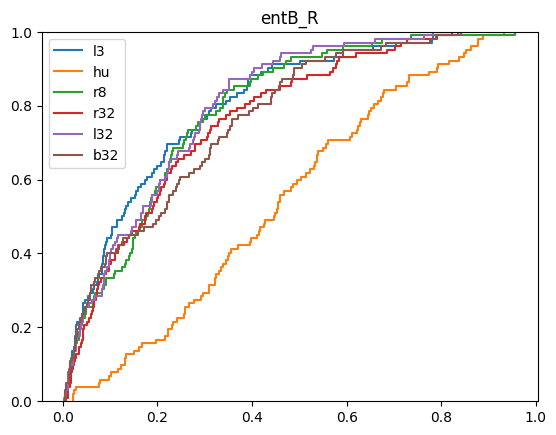

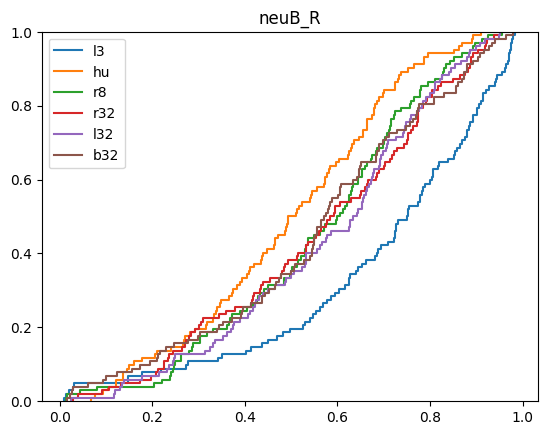

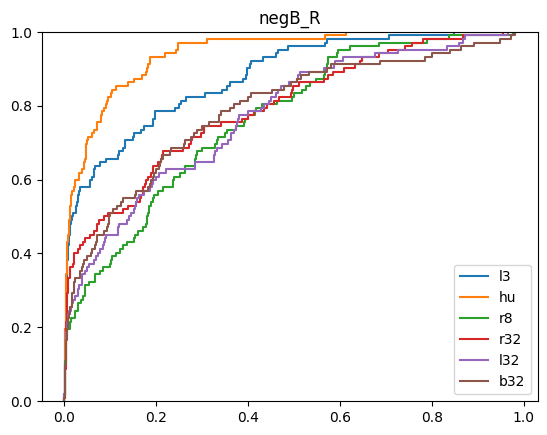

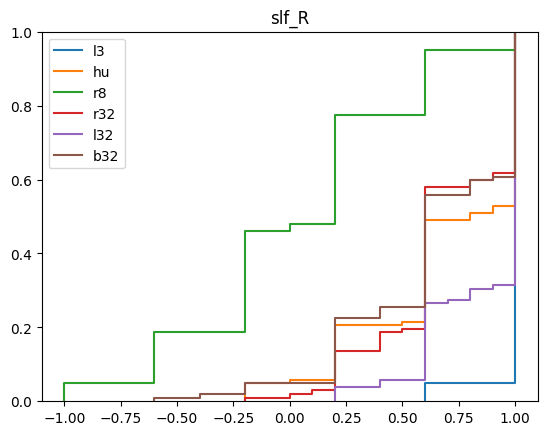

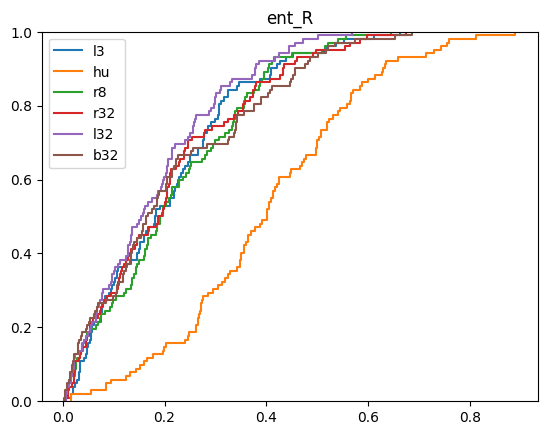

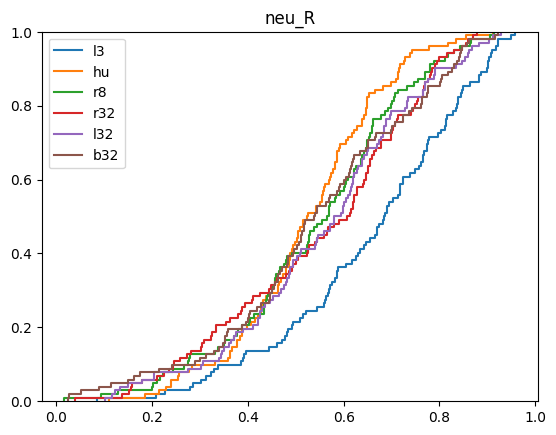

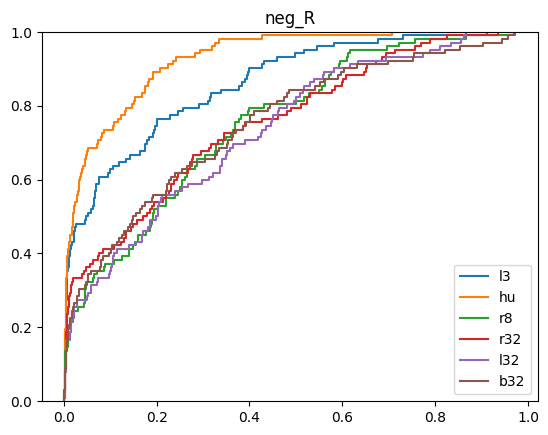

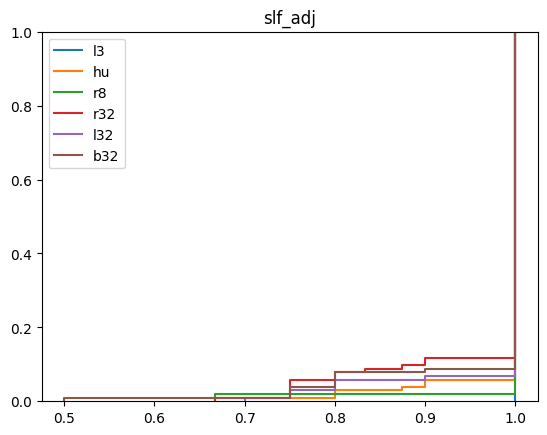

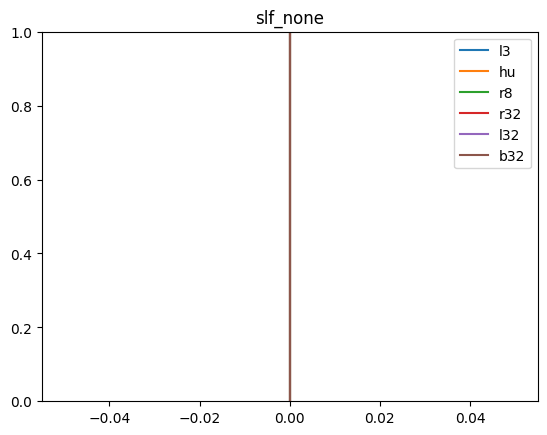

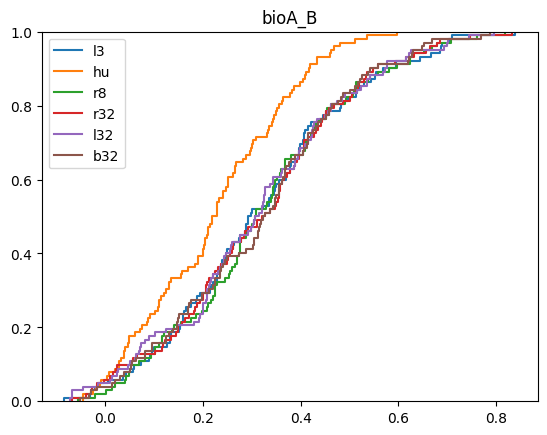

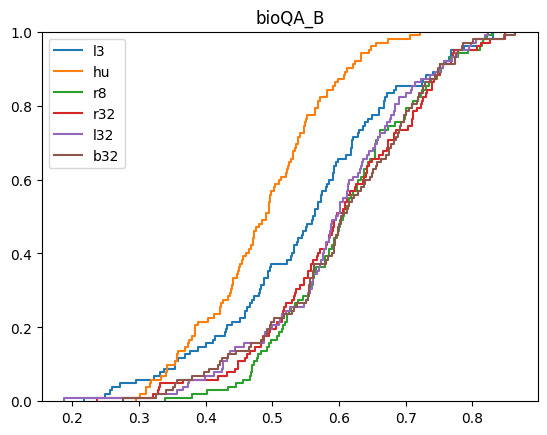

In [11]:
data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

for idx,col in enumerate(l3.columns):
  [fig,ax] = plt.subplots(1,1)
  for id,d in enumerate(data):
    tmp = d[col]
    tmp = tmp[~np.isnan(tmp)]
    ax.ecdf(tmp,label=nm[id])
  ax.set_title(col)
  ax.legend()
  plt.show()

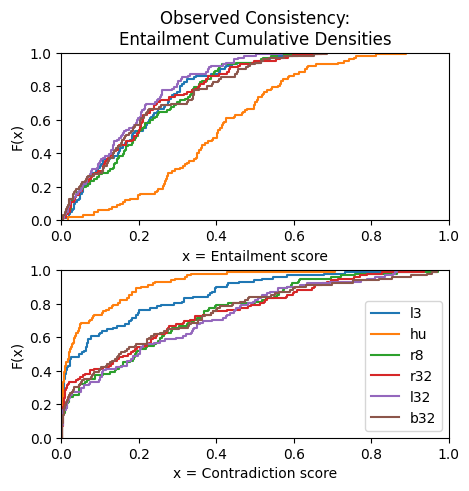

In [27]:
plt.rcParams.update({'font.size': 10})

data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

# ent_vars = ['ent_R','neu_R','neg_R']
ent_vars = ['ent_R','neg_R']

# [fig,ax] = plt.subplots(len(ent_vars),1,figsize=(5,8))
[fig,ax] = plt.subplots(len(ent_vars),1,figsize=(5,5))
for idx,col in enumerate(ent_vars):
  for id,d in enumerate(data):
    tmp = d[col]
    tmp = tmp[~np.isnan(tmp)]
    ax[idx].ecdf(tmp,label=nm[id])
  ax[idx].set_ylabel('F(x)')
  ax[idx].set_xlim(0,1)
  ax[idx].set_ylim(0,1)
ax[-1].legend()
fig.subplots_adjust(hspace=0.3)

ax[0].set_xlabel('x = Entailment score')
# ax[1].set_xlabel('x = Neutrality score')
# ax[2].set_xlabel('x = Negativity score')
ax[-1].set_xlabel('x = Contradiction score')


ax[0].set_title('Observed Consistency:\nEntailment Cumulative Densities')
plt.savefig(fig_out_dir +"observed_consistency_ecdf.png")
plt.show()

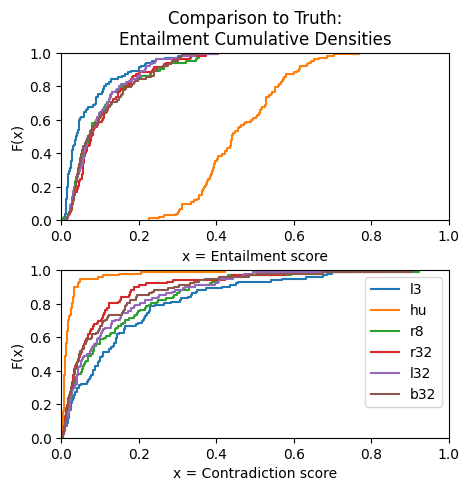

In [43]:
plt.rcParams.update({'font.size': 10})

data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

# ent_vars = ['ent_R','neu_R','neg_R']
# ent_vars = ['ent_R','neg_R']
ent_vars = ['ent','neg']

# [fig,ax] = plt.subplots(len(ent_vars),1,figsize=(5,8))
[fig,ax] = plt.subplots(len(ent_vars),1,figsize=(5,5))
for idx,col in enumerate(ent_vars):
  for id,d in enumerate(data):
    tmp = d[col]
    tmp = tmp[~np.isnan(tmp)]
    ax[idx].ecdf(tmp,label=nm[id])
  ax[idx].set_ylabel('F(x)')
  ax[idx].set_xlim(0,1)
  ax[idx].set_ylim(0,1)
ax[-1].legend()
fig.subplots_adjust(hspace=0.3)

ax[0].set_xlabel('x = Entailment score')
# ax[1].set_xlabel('x = Neutrality score')
# ax[2].set_xlabel('x = Negativity score')
ax[-1].set_xlabel('x = Contradiction score')


ax[0].set_title('Comparison to Truth:\nEntailment Cumulative Densities')
plt.savefig(fig_out_dir +"truth_entailment_ecdf.png")
plt.show()

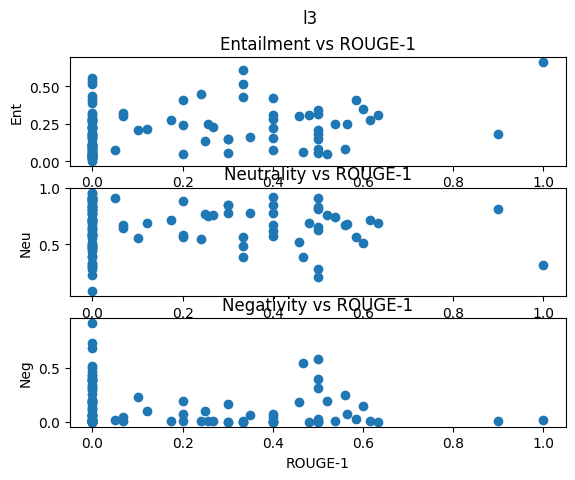

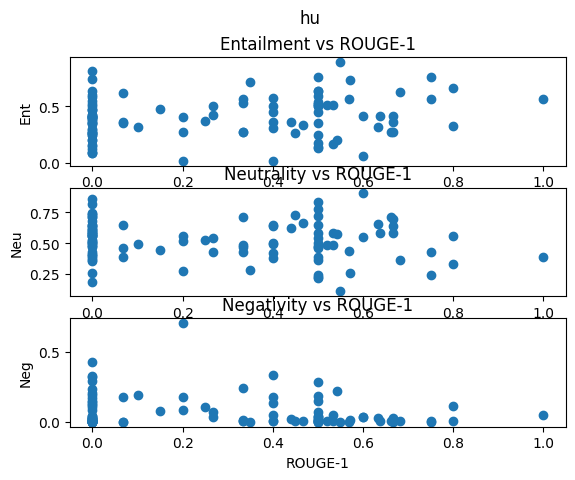

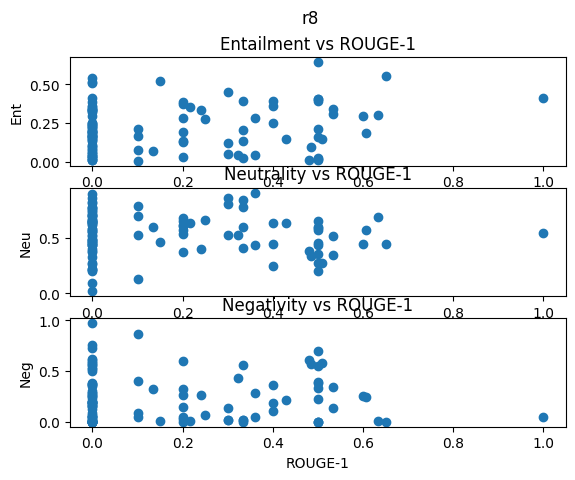

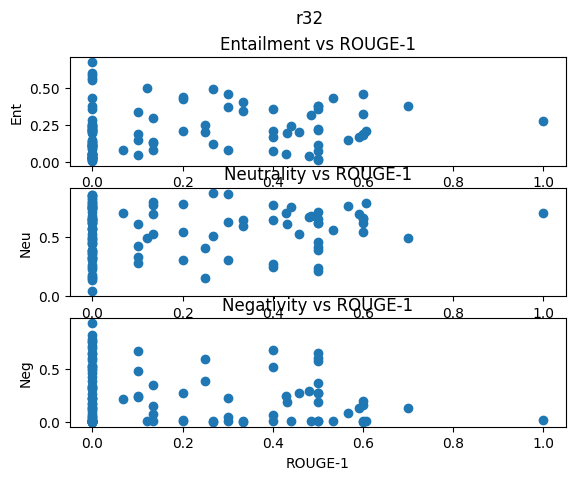

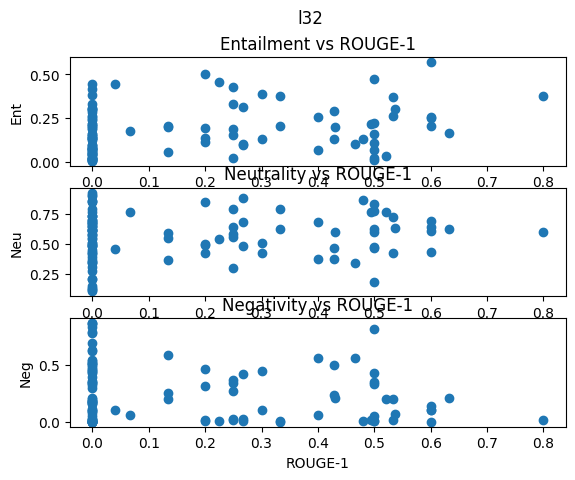

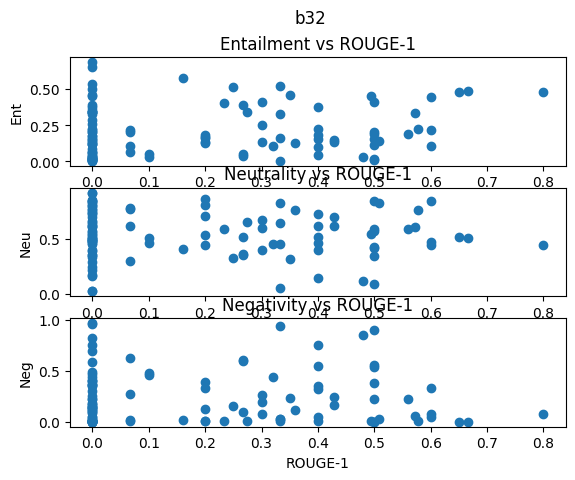

In [13]:
data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

for idx,d in enumerate(data):
  [fig,ax] = plt.subplots(3,1)
  ax[0].scatter(d.bow,d.ent_R)
  ax[0].set_title('Entailment vs ROUGE-1')
  ax[0].set_xlabel('ROUGE-1')
  ax[0].set_ylabel('Ent')
  ax[1].scatter(d.bow,d.neu_R)
  ax[1].set_title('Neutrality vs ROUGE-1')
  ax[1].set_xlabel('ROUGE-1')
  ax[1].set_ylabel('Neu')
  ax[2].scatter(d.bow,d.neg_R)
  ax[2].set_title('Negativity vs ROUGE-1')
  ax[2].set_xlabel('ROUGE-1')
  ax[2].set_ylabel('Neg')
  plt.suptitle(nm[idx])
  plt.show()

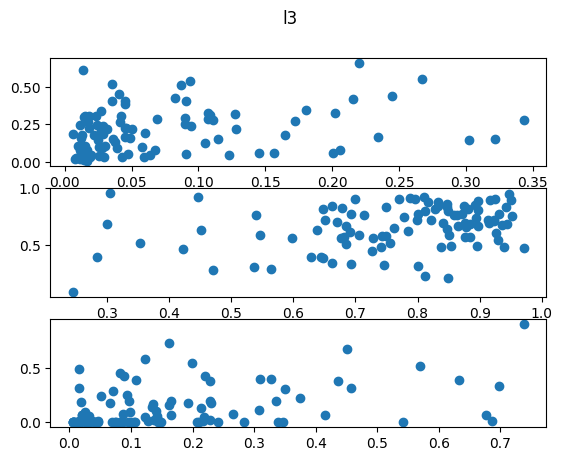

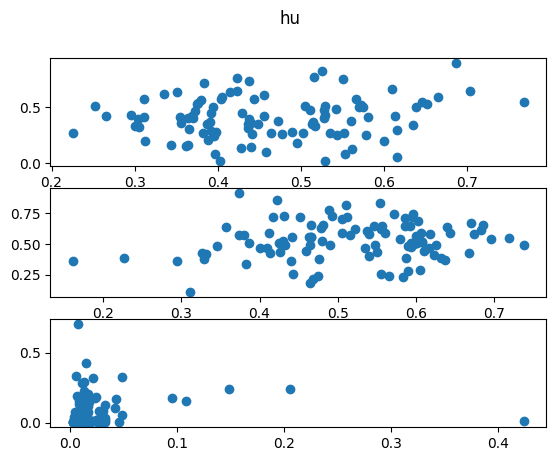

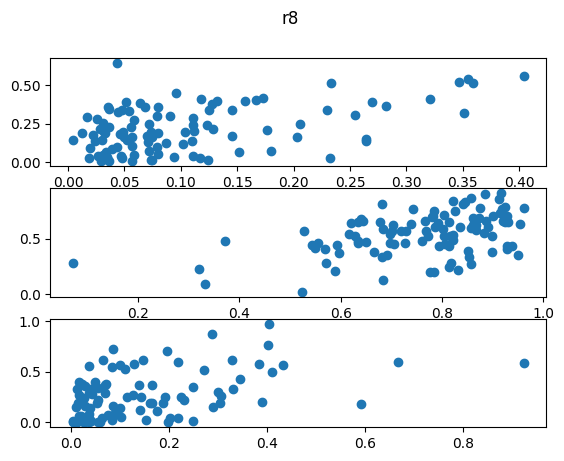

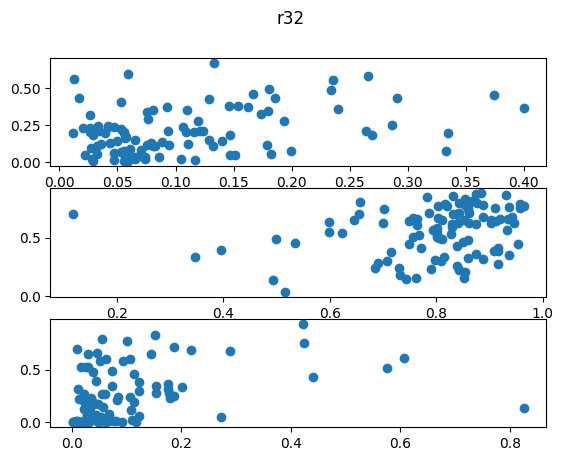

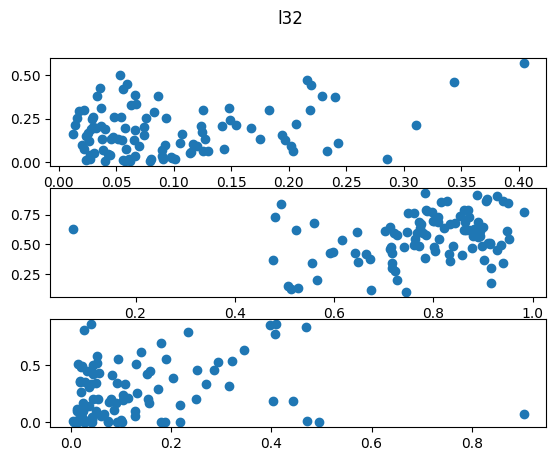

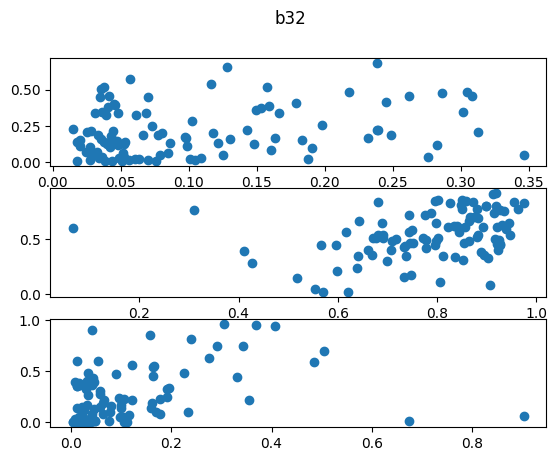

In [14]:
data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

for idx,d in enumerate(data):
  [fig,ax] = plt.subplots(3,1)
  ax[0].scatter(d.ent,d.ent_R)
  # ax[0].set_title('Entailment vs ROUGE-1')
  # ax[0].set_xlabel('ROUGE-1')
  # ax[0].set_ylabel('Ent')
  ax[1].scatter(d.neu,d.neu_R)
  # ax[1].set_title('Neutrality vs ROUGE-1')
  # ax[1].set_xlabel('ROUGE-1')
  # ax[1].set_ylabel('Neu')
  ax[2].scatter(d.neg,d.neg_R)
  # ax[2].set_title('Negativity vs ROUGE-1')
  # ax[2].set_xlabel('ROUGE-1')
  # ax[2].set_ylabel('Neg')
  plt.suptitle(nm[idx])
  plt.show()

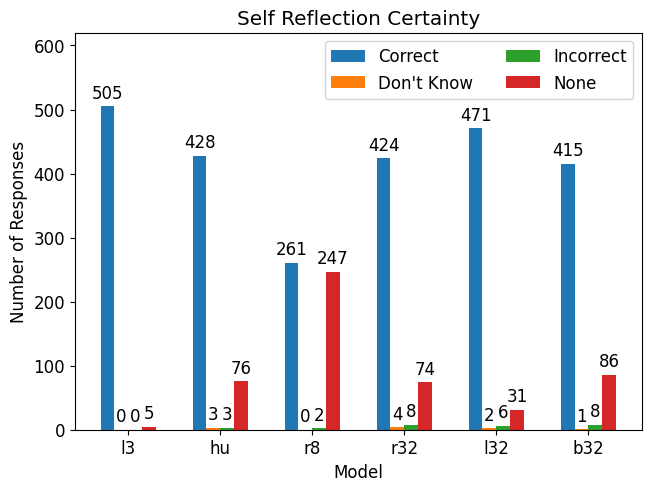

In [15]:
# visualize self scoring results

plt.rcParams.update({'font.size': 12})

data = [l3R0, huR0, r8R0, r32R0, l32R0, b32R0]
nm = ['l3','hu','r8','r32','l32','b32']

bar_data = {
    "Correct": [np.sum(d['slf'] == 1) for d in data],
    "Don't Know": [np.sum(d['slf'] == 0.5) for d in data],
    "Incorrect": [np.sum(d['slf'] == 0) for d in data],
    "None": [np.sum(np.isnan(d['slf'])) for d in data]
}

x = np.arange(len(nm))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in bar_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Model')
ax.set_title('Self Reflection Certainty')
ax.set_xticks(x + 1.5*width, nm)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0,620)

plt.savefig(fig_out_dir +"self_refelction_certainty_bar.png")
plt.show()



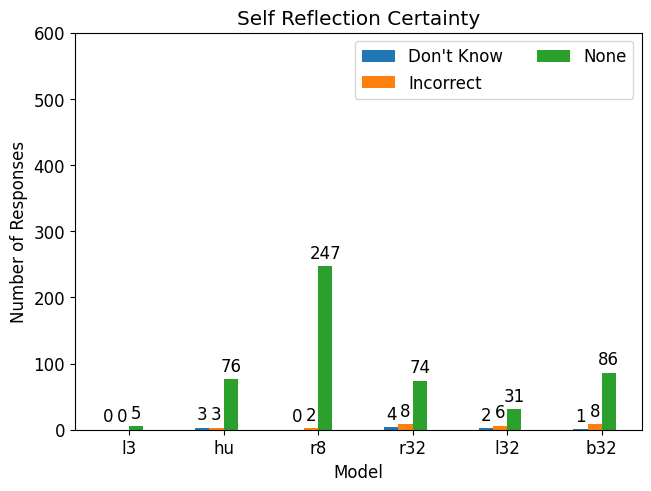

In [16]:
# visualize self scoring results

data = [l3R0, huR0, r8R0, r32R0, l32R0, b32R0]
nm = ['l3','hu','r8','r32','l32','b32']

bar_data = {
    "Don't Know": [np.sum(d['slf'] == 0.5) for d in data],
    "Incorrect": [np.sum(d['slf'] == 0) for d in data],
    "None": [np.sum(np.isnan(d['slf'])) for d in data]
}

x = np.arange(len(nm))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in bar_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Responses')
ax.set_xlabel('Model')
ax.set_title('Self Reflection Certainty')
ax.set_xticks(x + 1.5*width, nm)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0,600)

plt.show()

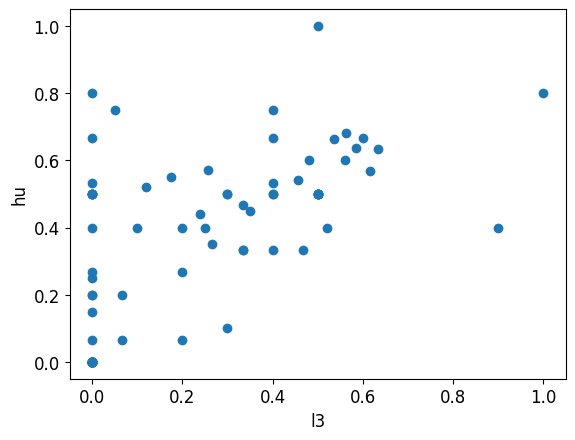

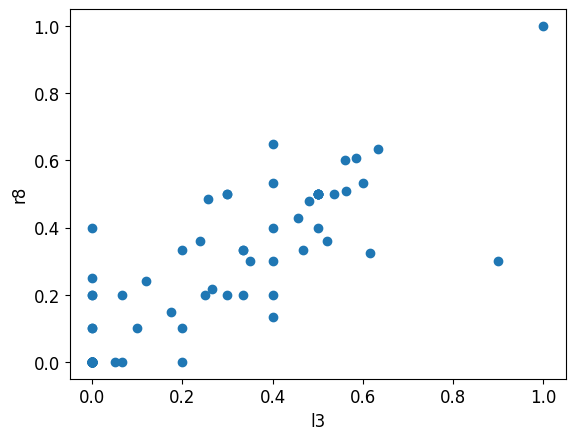

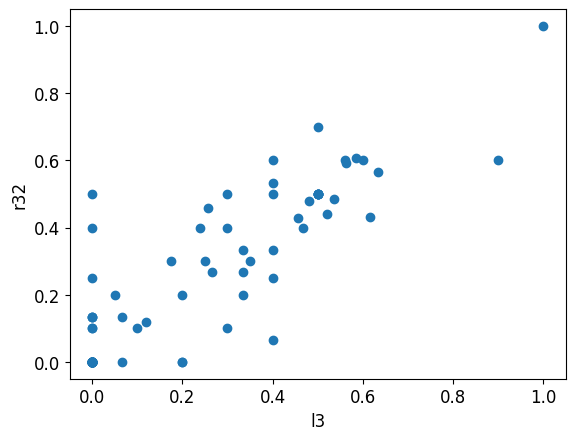

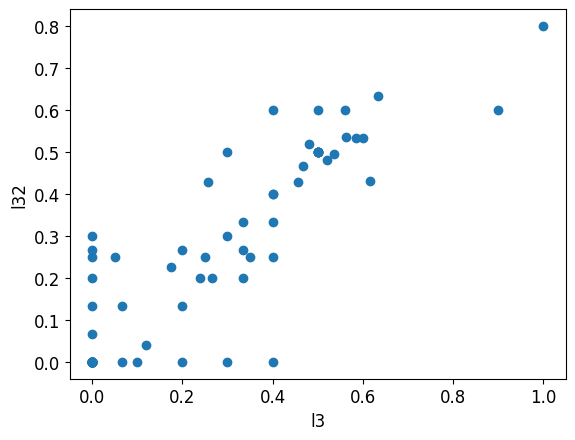

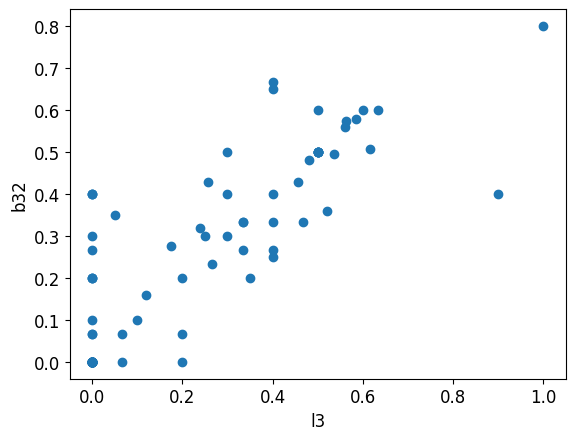

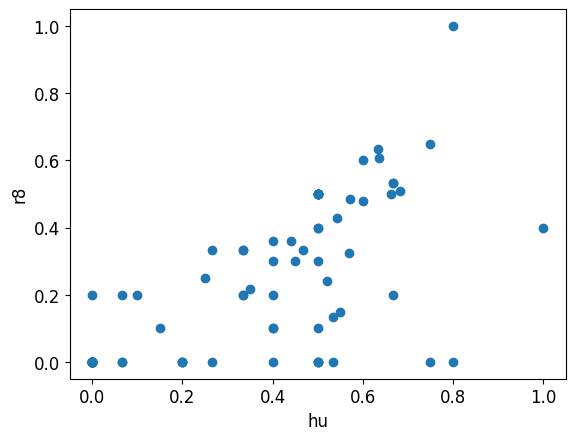

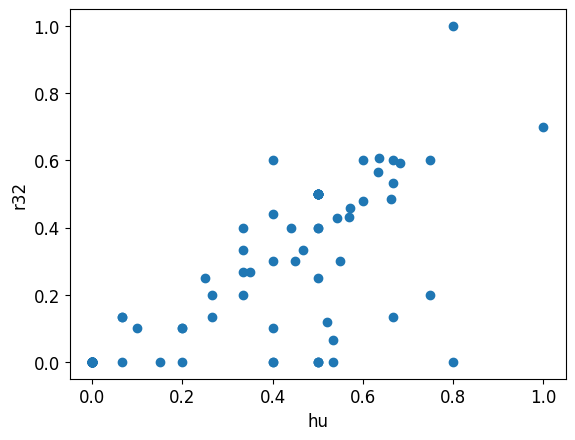

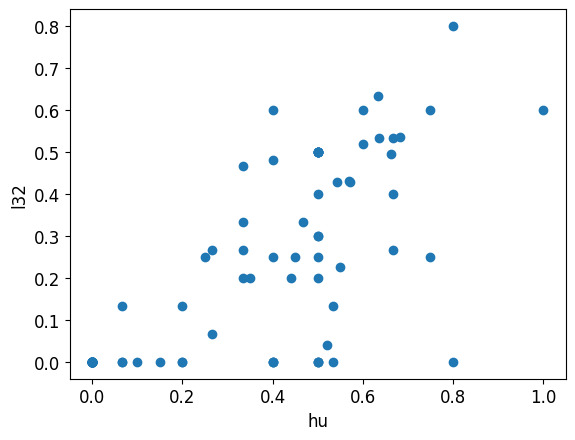

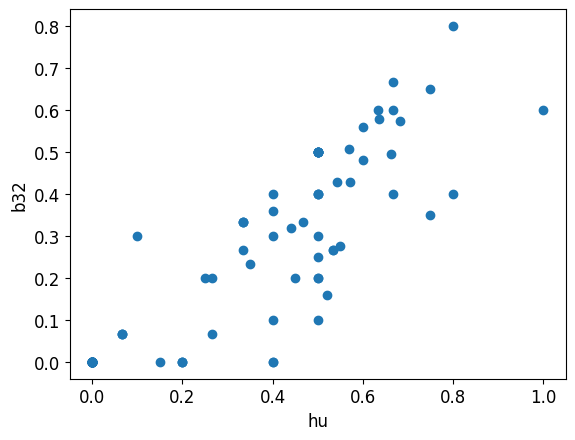

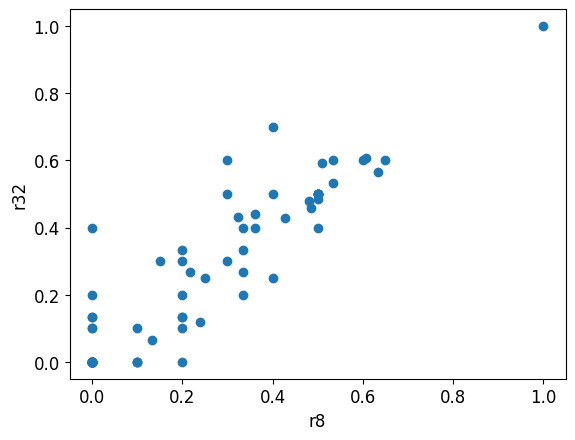

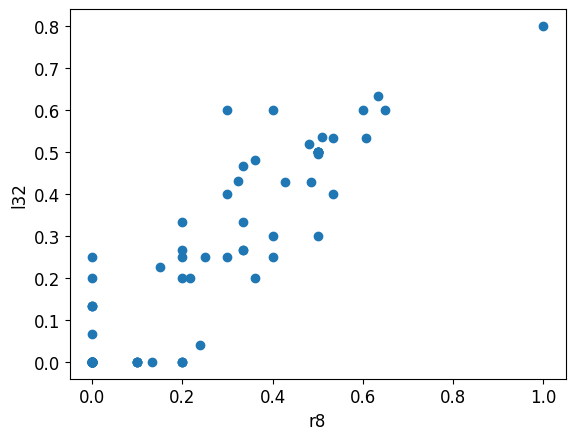

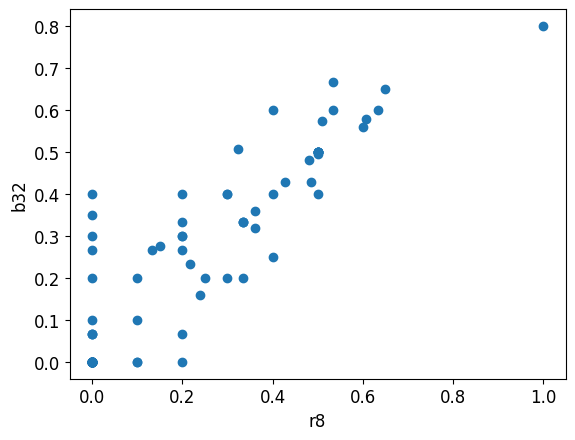

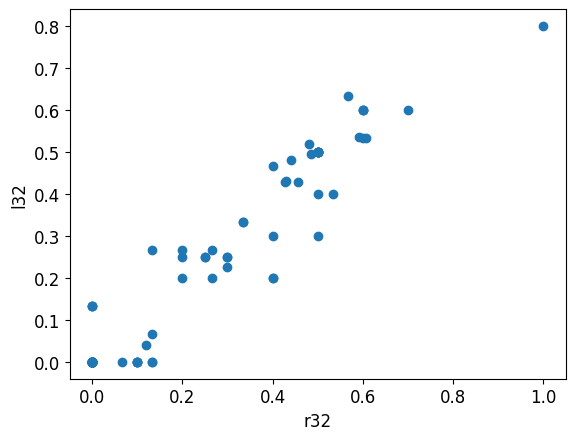

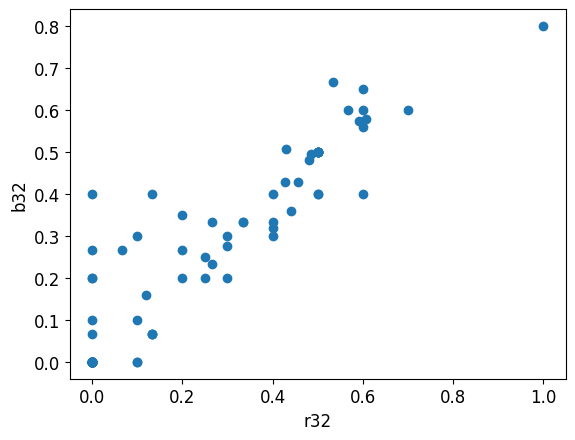

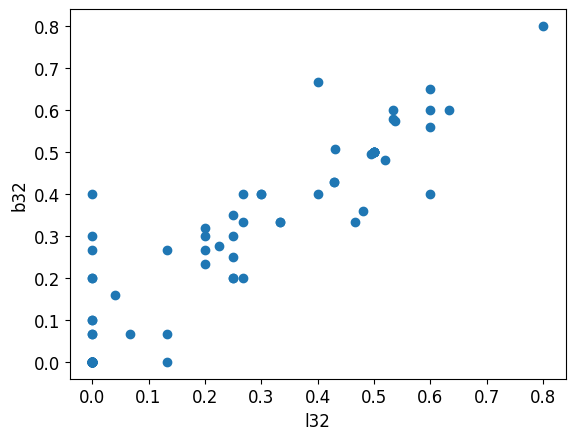

In [17]:
# did the models struggle with the same questions?

data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']
var = 'bow'

for (i,di) in enumerate(data):
  for (j,dj) in enumerate(data):
    if i >= j:
      continue

    [fig,ax] = plt.subplots(1,1)
    ax.scatter(di[var],dj[var])
    ax.set_xlabel(nm[i])
    ax.set_ylabel(nm[j])
    plt.show()


In [18]:
r8.neg[52:58]

52    0.026224
53    0.016624
54    0.924144
55    0.036543
56    0.003489
57    0.403146
Name: neg, dtype: float64

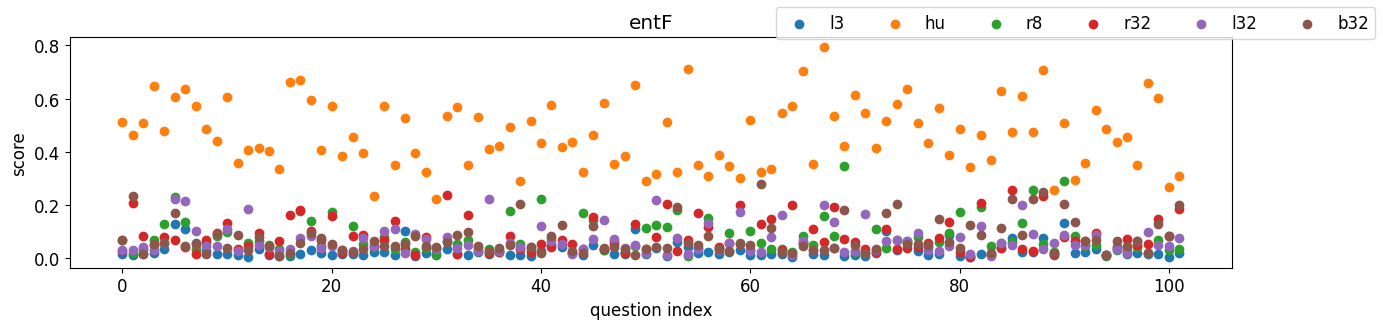

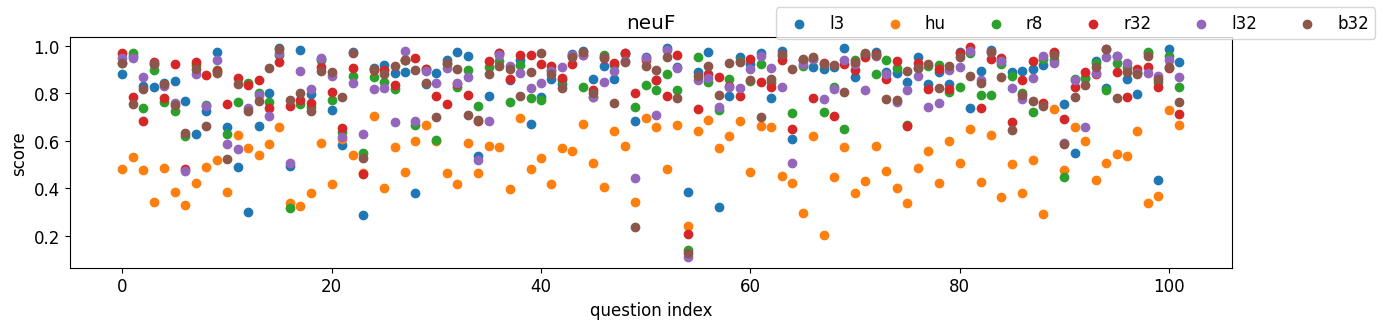

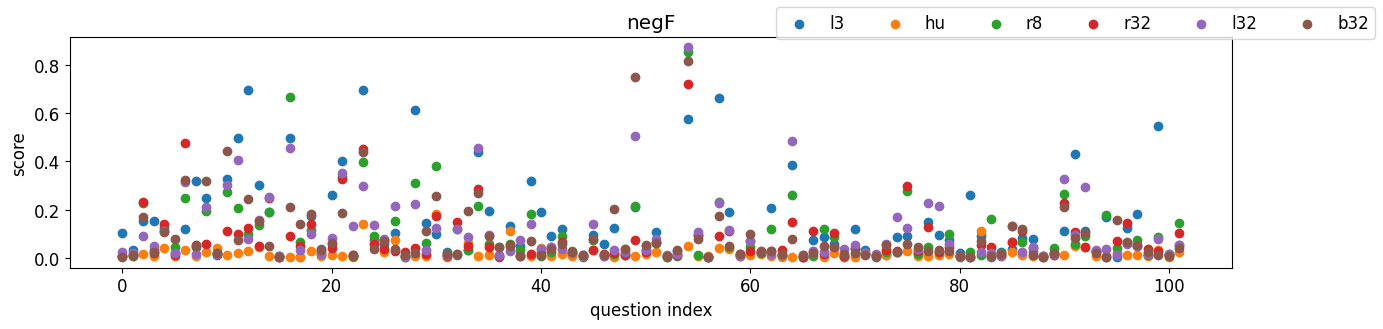

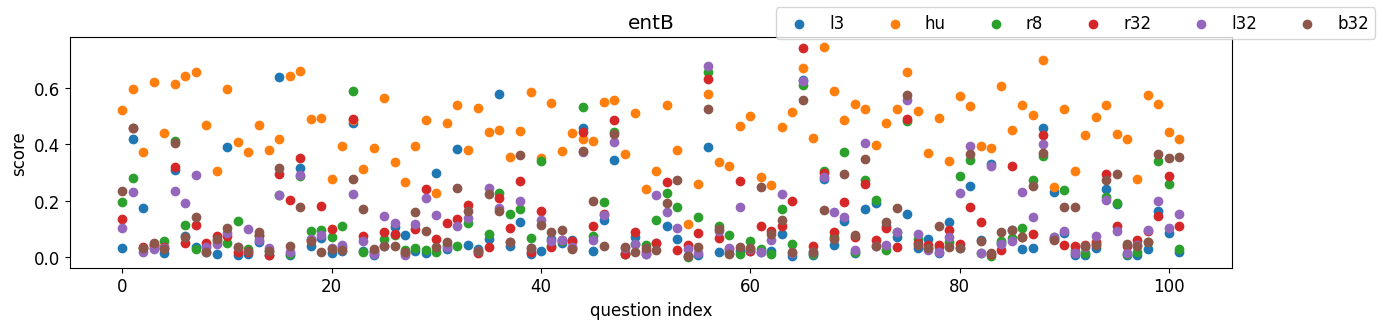

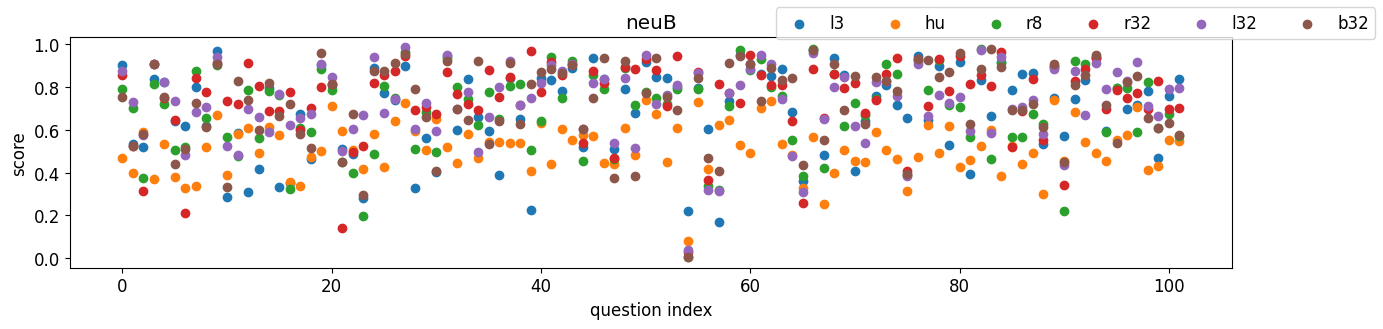

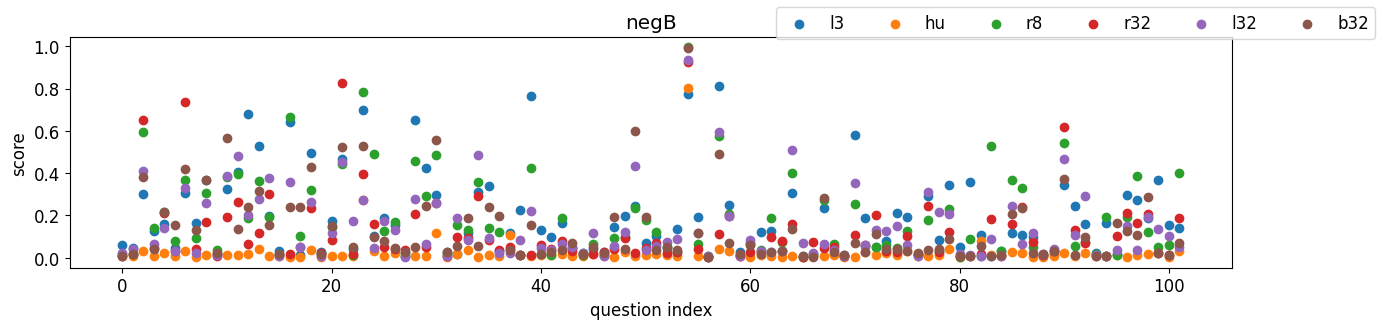

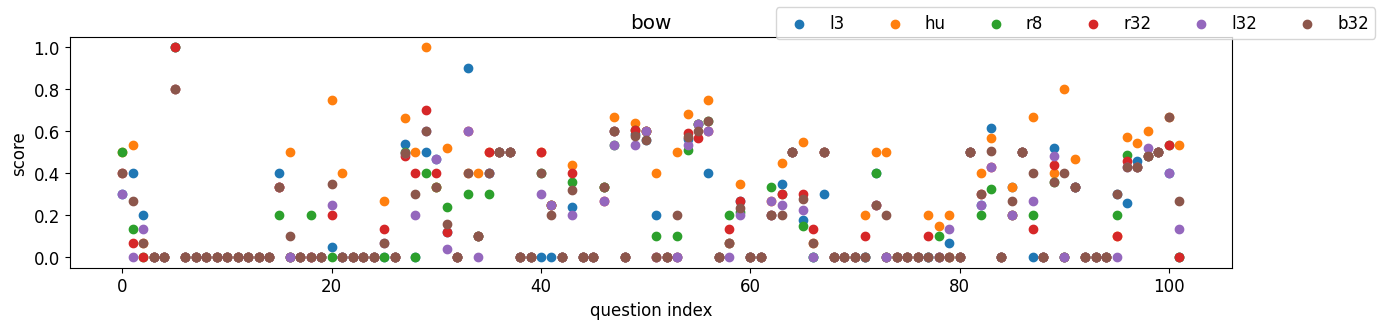

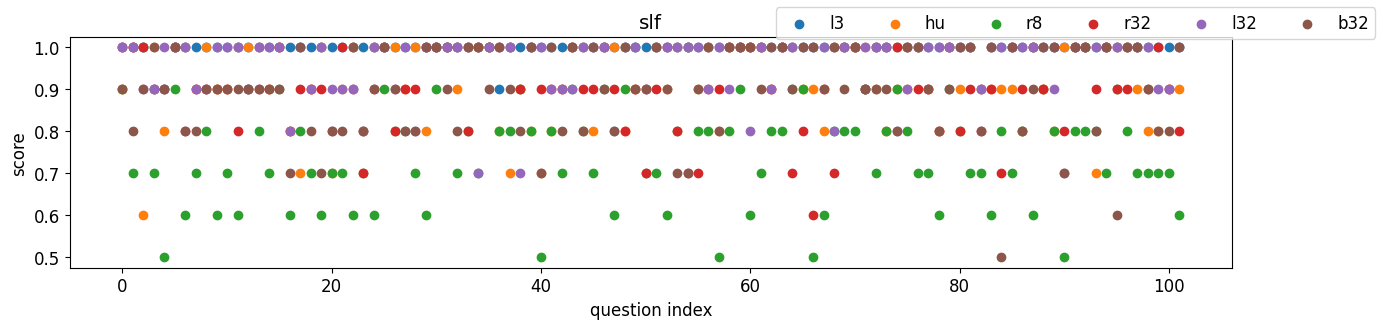

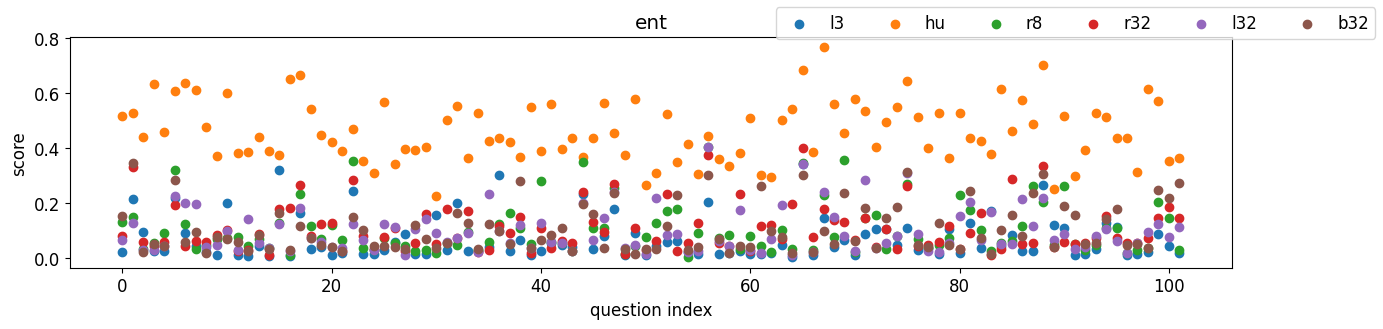

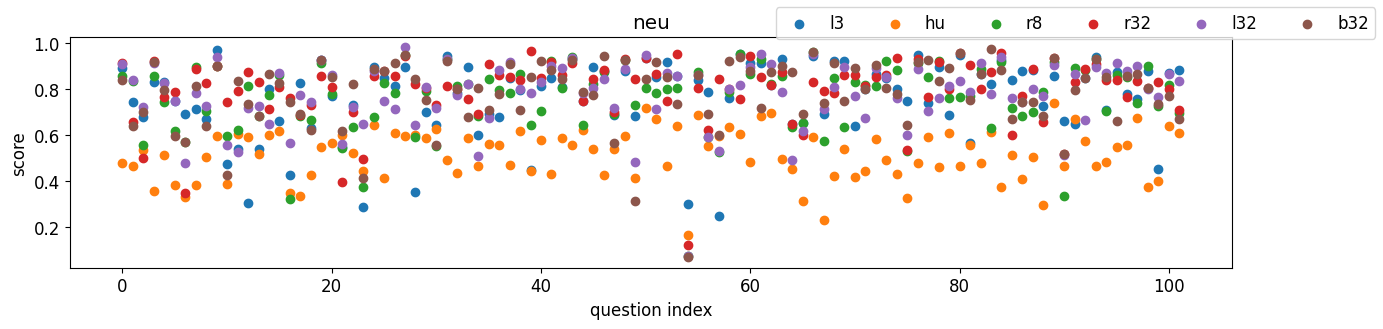

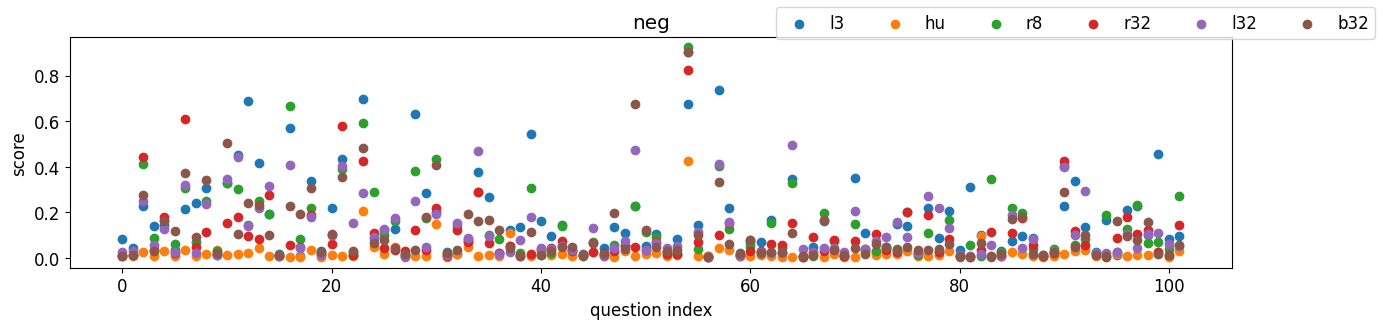

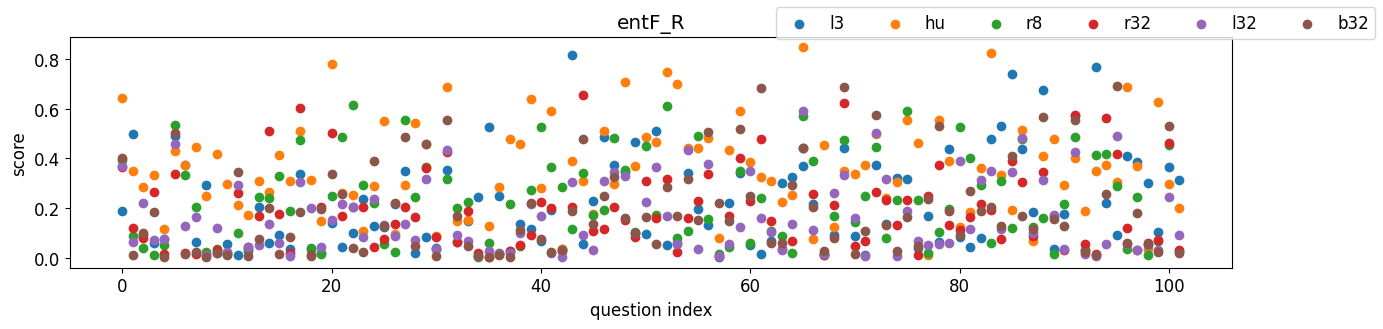

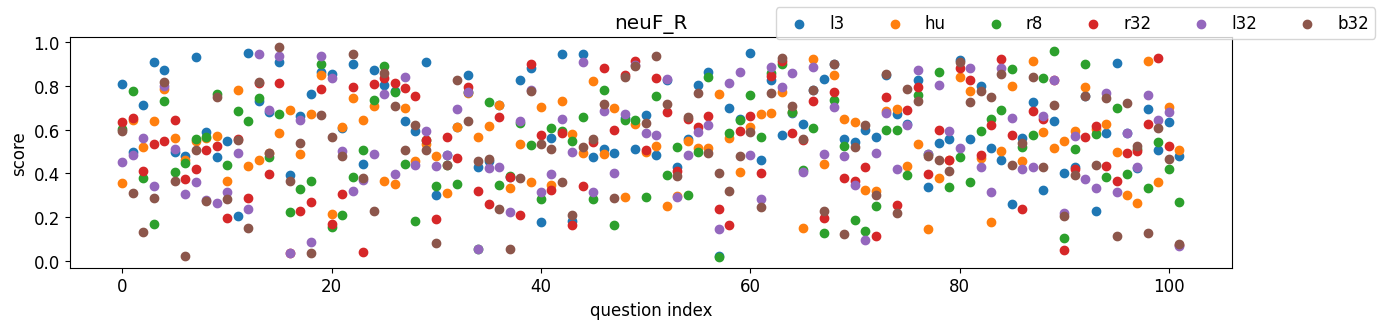

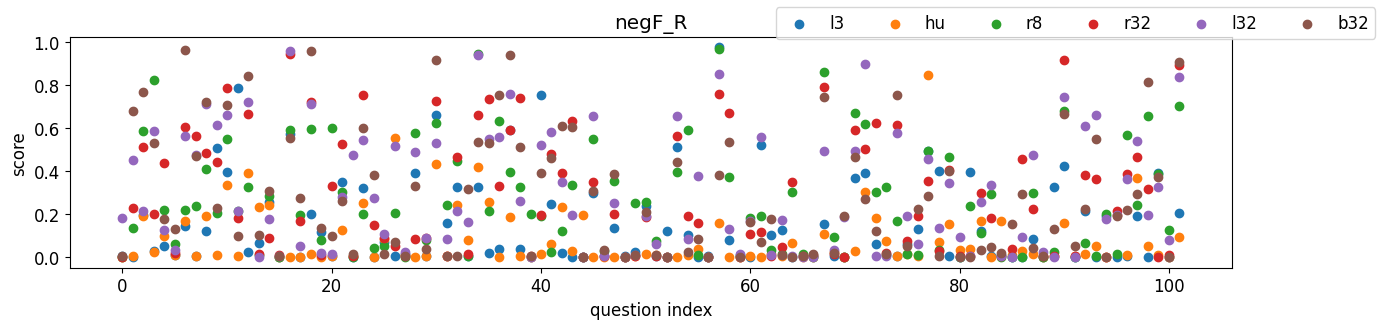

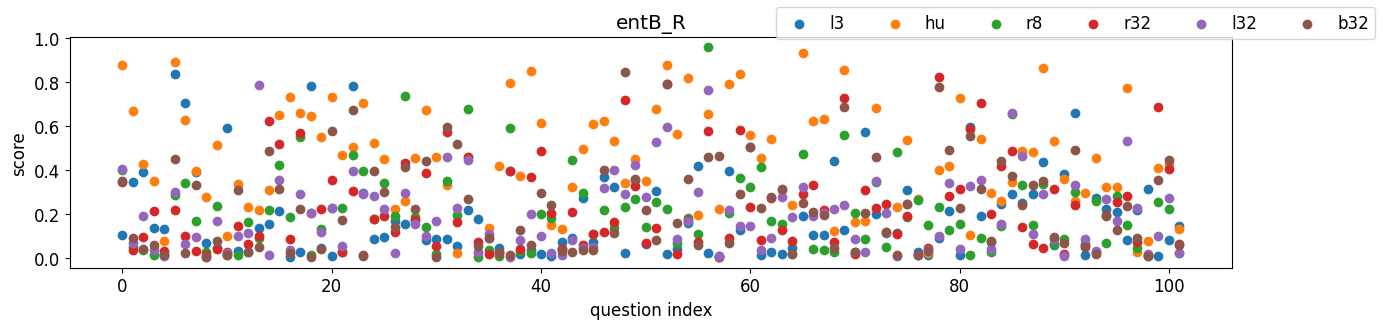

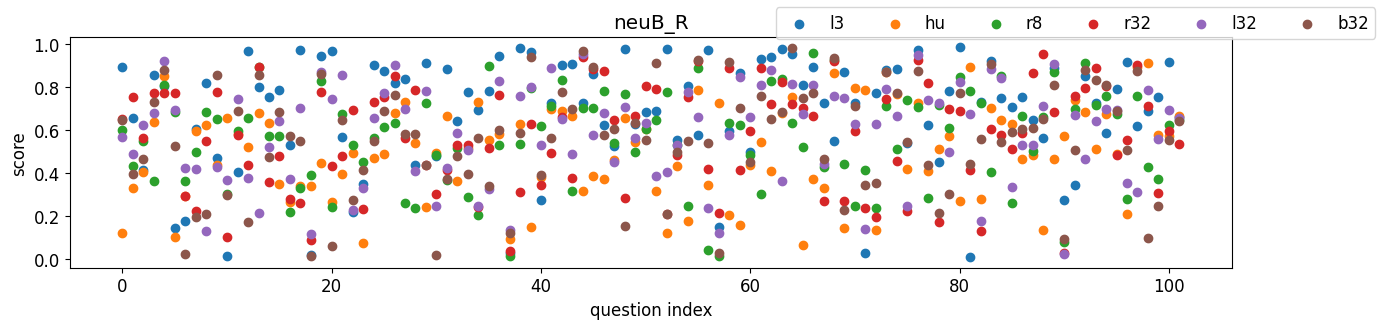

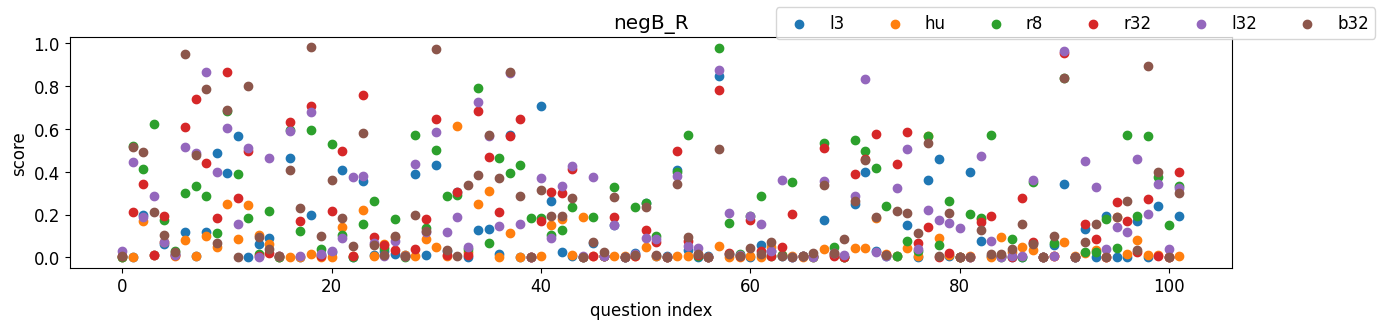

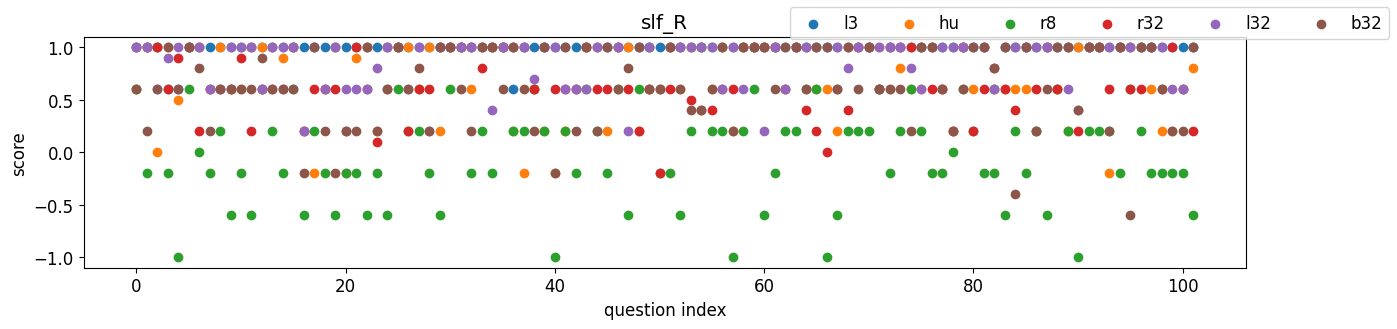

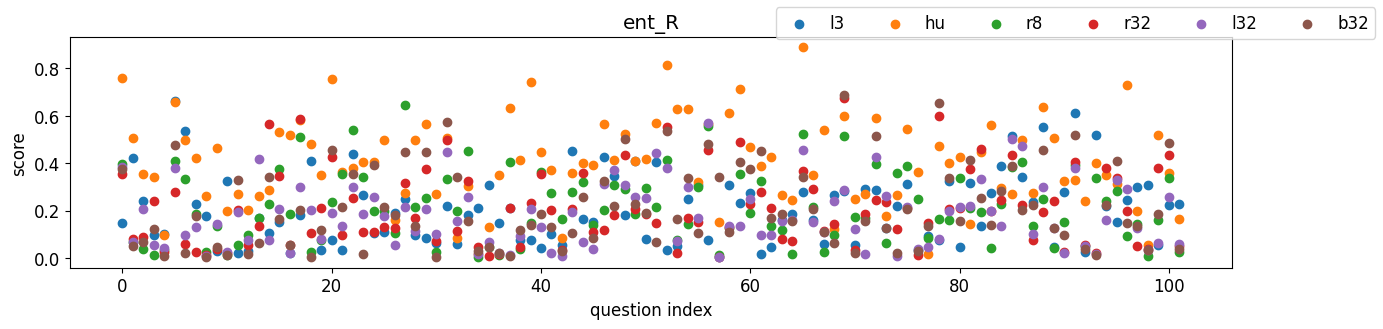

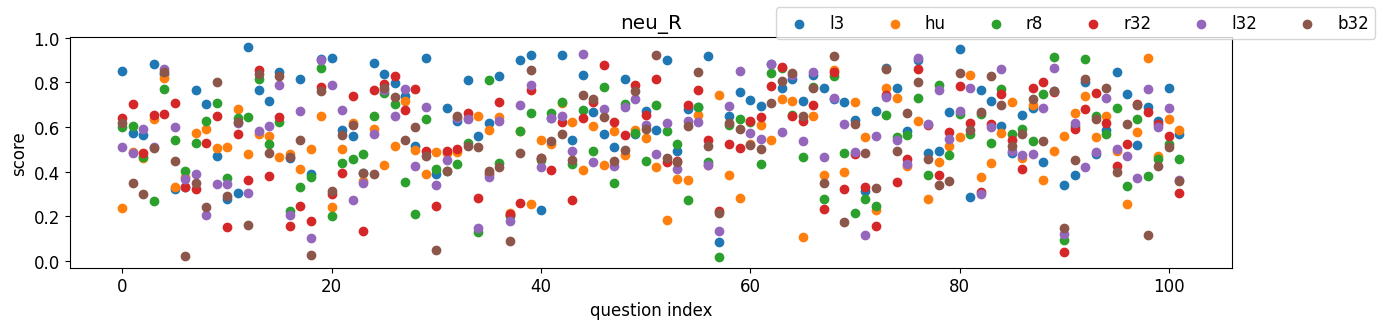

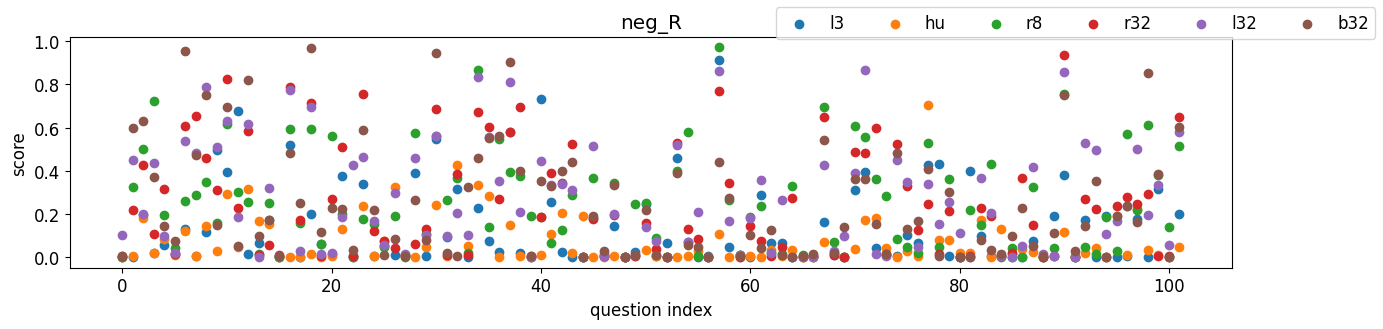

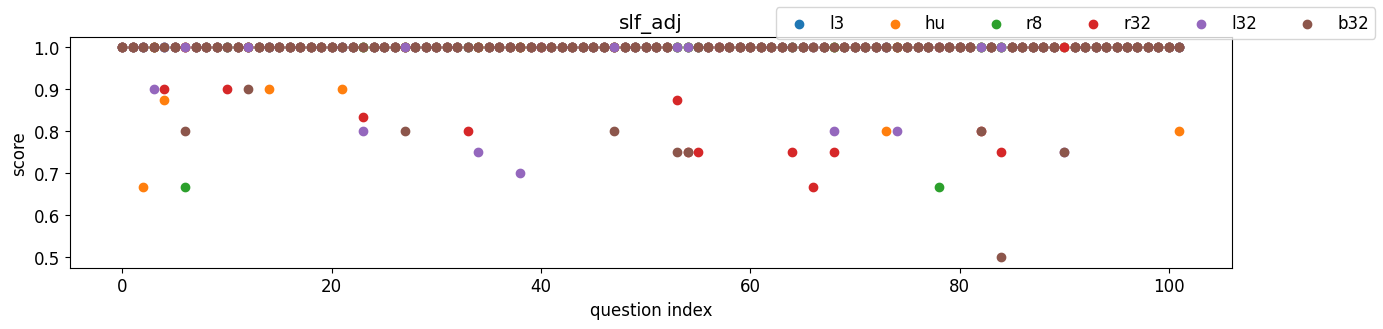

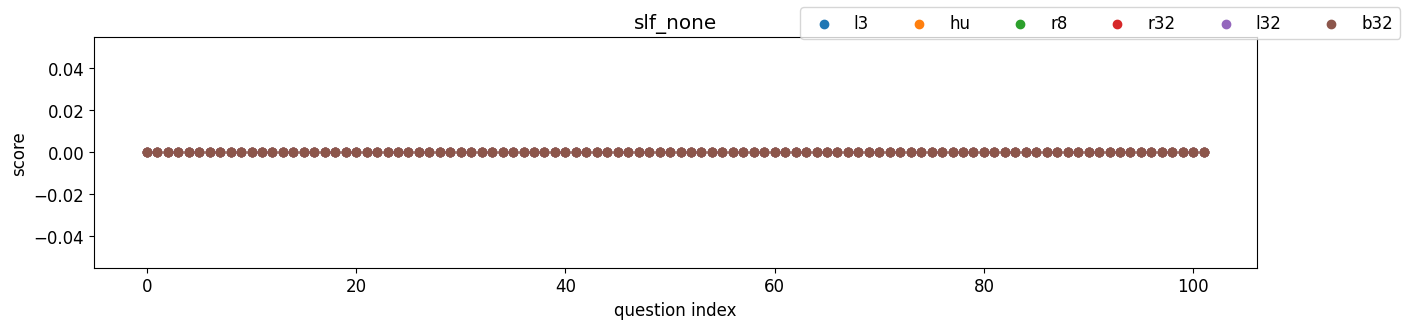

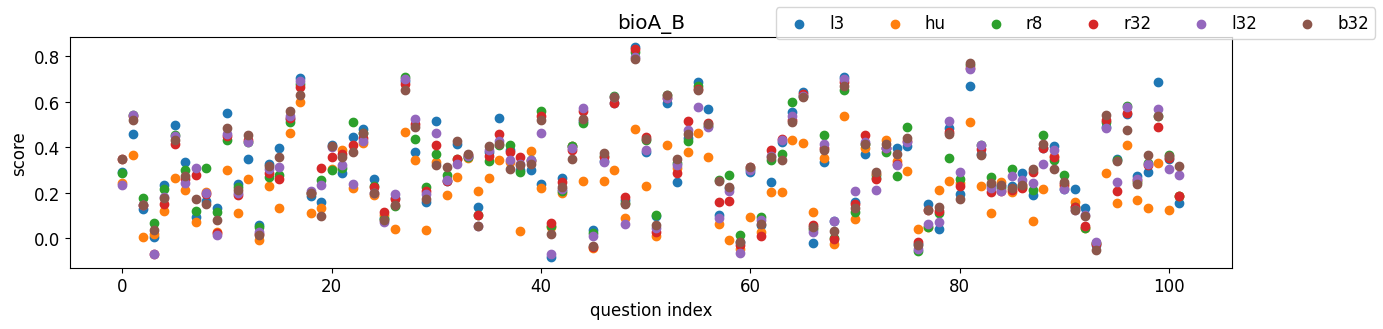

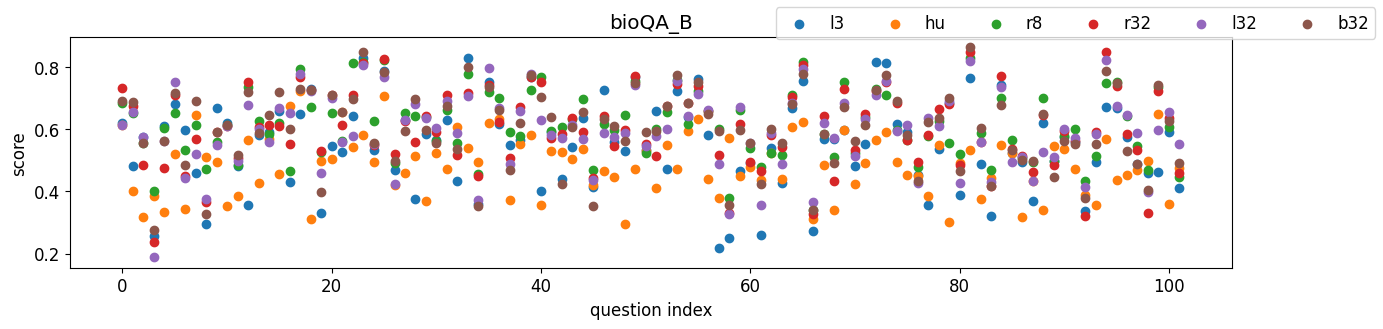

In [19]:
# did the models struggle with the same questions?

data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']
var = 'bow'

for var in l3.columns:
  [fig,ax] = plt.subplots(1,1,figsize=(15,3))
  for (i,d) in enumerate(data):
    ax.scatter(np.arange(len(d)),d[var],label=nm[i])
  fig.legend(loc='outside upper right', ncols=len(data))
  ax.set_title(var)
  ax.set_ylabel('score')
  ax.set_xlabel('question index')
  plt.show()

## Between model correlation

In [54]:
df_corr = summary[['bow','ent','ent_R']].rename(columns={'bow':'R1','ent':'Ent','ent_R':'OC'}).corr()
df_corr

R1       Ent        OC
R1   1.000000  0.978683  0.980191
Ent  0.978683  1.000000  0.985592
OC   0.980191  0.985592  1.000000

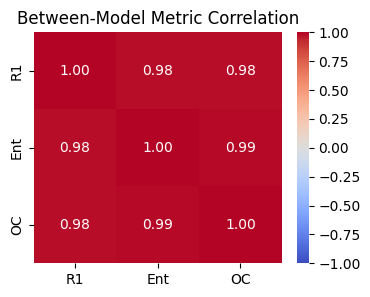

In [55]:
plt.figure(figsize=(4, 3))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f",vmin=-1,vmax=1)
plt.title('Between-Model Metric Correlation')
plt.savefig(fig_out_dir +"btwn_model_corr.png")
plt.show()

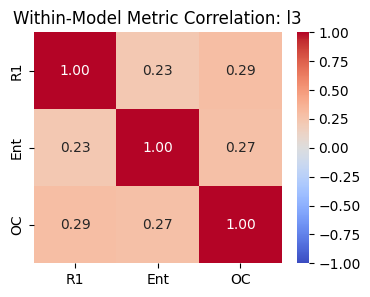

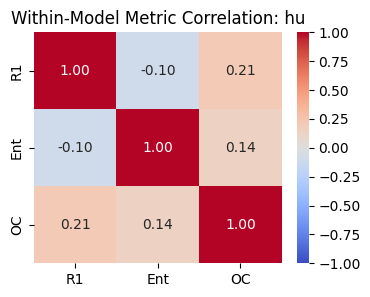

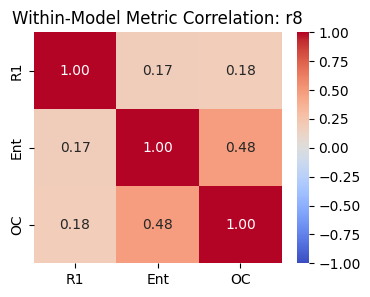

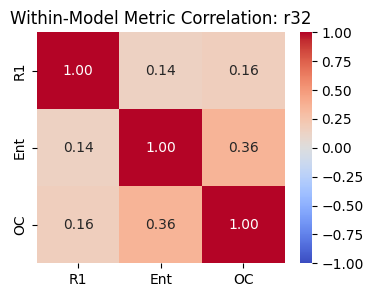

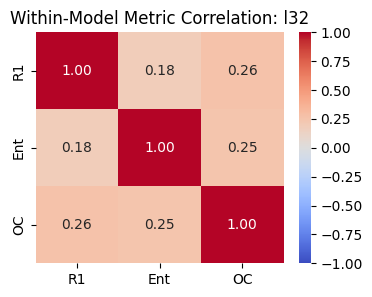

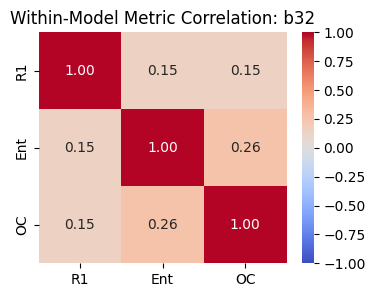

In [59]:
data = [l3, hu, r8, r32, l32, b32]
nm = ['l3','hu','r8','r32','l32','b32']

for (i,d) in enumerate(data):
  df_corr = d[['bow','ent','ent_R']].rename(columns={'bow':'R1','ent':'Ent','ent_R':'OC'}).corr()
  plt.figure(figsize=(4, 3))
  sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f",vmin=-1,vmax=1)
  plt.title('Within-Model Metric Correlation: '+nm[i])
  plt.savefig(fig_out_dir +f"within_model_corr_{nm[i]}.png")
  plt.show()